# Pymaceuticals Inc.
---

### Analysis

- The correlation between rat weight and average tumor volume is calculated using the pearsonr function of the scipy.stats package. Then, a linear regression model is created to estimate the average tumor volume from the weight of the rats, using the linregress function of the same package.

- The relationship between rat weight and average tumor volume is plotted on a scatter plot. The linear regression line, calculated from the coefficients obtained in the linear regression model, is also plotted.

- At the end of the paper, the value of the correlation between rat weight and average tumor volume, which is 0.84, is printed in the standard output.

- The correlation of 0.84 indicates that there is a positive and significant linear relationship between rat weight and average tumor volume over the course of Capomulin treatment. Therefore, the weight of the rats appears to be a good predictor of average tumor volume in the course of Capomulin treatment.

- The estimated linear regression model with slope and intercept coefficients also provides a fitted line that allows estimation of average tumor volume from rat weight. This fit line allows a simpler and more accurate visualization of the relationship between rat weight and average tumor volume on Capomulin treatment.


In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_mouse_study_df = pd.merge(study_results,mouse_metadata,how='left',on='Mouse ID')
combine_mouse_study_df.head()
# Display the data table for preview
combine_mouse_study_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [17]:
# Checking the number of mice.
num_mice_count = combine_mouse_study_df['Mouse ID'].nunique()
num_mice_count = combine_mouse_study_df.groupby('Mouse ID').count()
num_mice_count['Timepoint'].count()

249

In [18]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combine_mouse_study_df[combine_mouse_study_df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
# duplicate_data_mice = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicatemouse_id)]
# duplicate_data_mice.sort_values[duplicate_data_mice]
duplicate_mouse_data = combine_mouse_study_df.duplicated(['Mouse ID','Timepoint'],keep=False)
combine_mouse_study_df[duplicate_mouse_data]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_mouse_study_df = combine_mouse_study_df[combine_mouse_study_df['Mouse ID'].isin(duplicate_mouse_id)==False].reset_index()
#clean_mouse_study_df
mice_id_data=combine_mouse_study_df.set_index('Mouse ID')
clean_mouse_study_df = mice_id_data.drop('g989').reset_index()
clean_mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [21]:
# Checking the number of mice in the clean DataFrame.
#duplicatemice.count()
clean_mice_count = clean_mouse_study_df.groupby(['Mouse ID']).count()
clean_mice_count['Timepoint'].count()

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_col=clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_col=clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_col=clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_col=clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_col=clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sum_stats_dataframe=pd.concat([mean_col,median_col,var_col,std_col,sem_col])

# Assemble the resulting series into a single summary DataFrame.
sum_stats_dataframe=pd.DataFrame({'Mean Tumor Volume':mean_col,
                                'Median Tumor Volume':median_col,
                                'Tumor Volume Variance':var_col,
                                'Tumor Volume Std. Dev.':std_col,
                                'Tumor Volume SEM':sem_col})
sum_stats_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
adv_sum_stats=clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
adv_sum_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

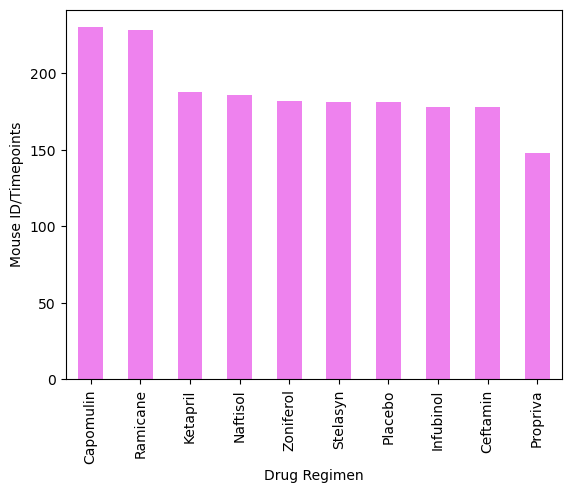

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count_bar_plot=clean_mouse_study_df['Drug Regimen'].value_counts()
drug_regimen_count_bar_plot.plot(kind='bar',color='violet',align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse ID/Timepoints')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

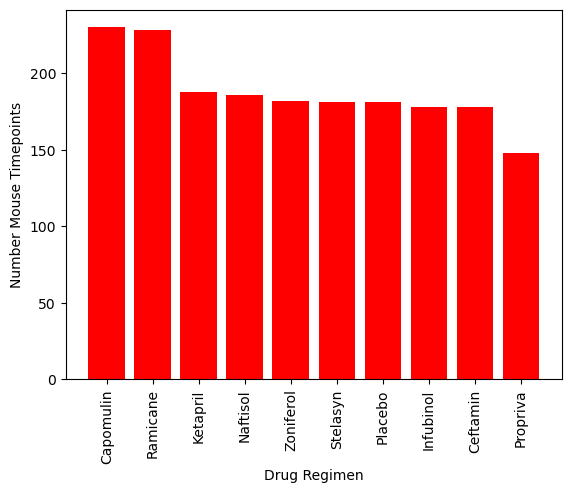

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_count_pyplot=clean_mouse_study_df['Drug Regimen'].value_counts()
plt.bar(drug_regimen_count_pyplot.index, drug_regimen_count_pyplot.values, color='red', align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number Mouse Timepoints')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

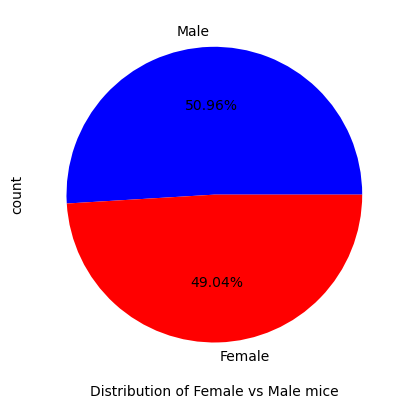

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fem_male_dis_pieplot=clean_mouse_study_df['Sex'].value_counts()
fem_male_dis_pieplot.plot(kind='pie',autopct='%1.2f%%',colors=['blue','red'])
plt.xlabel('Distribution of Female vs Male mice')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

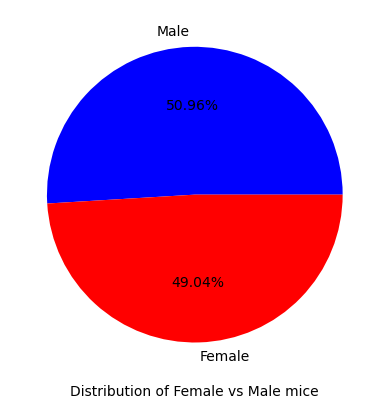

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fem_male_dis_pie_pyplot=clean_mouse_study_df['Sex'].value_counts()
plt.pie(fem_male_dis_pie_pyplot, labels=fem_male_dis_pie_pyplot.index, autopct='%1.2f%%', colors=['blue','red'])
plt.xlabel('Distribution of Female vs Male mice')
plt.show

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Start by getting the last (greatest) timepoint for each mouse
great_timepoint_each_mouse=clean_mouse_study_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_final_tumor=pd.merge(great_timepoint_each_mouse,clean_mouse_study_df,on=['Mouse ID','Timepoint'],how='left')
merge_final_tumor=merge_final_tumor[merge_final_tumor['Drug Regimen'].isin(final_tumor)]
merge_final_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list=[]

In [30]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug_regimen in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_drug_tumor_vol=merge_final_tumor.loc[merge_final_tumor['Drug Regimen']==drug_regimen,'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data_list.append(mice_drug_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = mice_drug_tumor_vol.quantile([.25,.5,.75])
    low_quartiles = quartiles[0.25]
    up_quartiles = quartiles[0.75]
    iqr_value = up_quartiles - low_quartiles

    low_bound = low_quartiles-(1.5*iqr_value)
    up_bound = up_quartiles+(1.5*iqr_value)

    outliers = mice_drug_tumor_vol.loc[(mice_drug_tumor_vol<low_bound)|(mice_drug_tumor_vol>up_bound)]

    print(f'{drug_regimen} potential ouliers is {outliers}')

Capomulin potential ouliers is Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential ouliers is Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential ouliers is 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential ouliers is Series([], Name: Tumor Volume (mm3), dtype: float64)


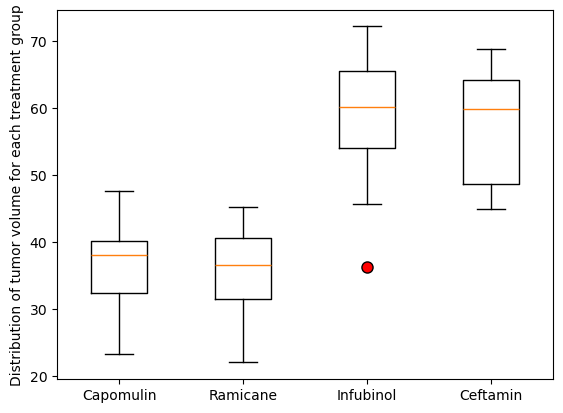

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data_list, labels=treatments_list, flierprops=dict(marker='o', markersize=8, markerfacecolor='red', linestyle='none'))
plt.ylabel('Distribution of tumor volume for each treatment group')
plt.show()

## Line and Scatter Plots

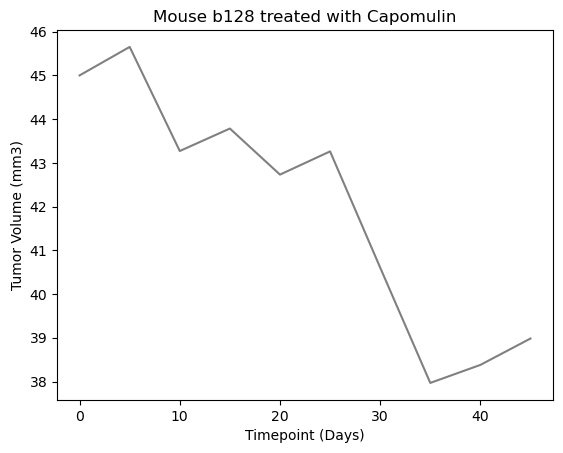

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_line_plot_mouse=clean_mouse_study_df[clean_mouse_study_df['Drug Regimen']=='Capomulin']
capomulin_time_point=capomulin_line_plot_mouse[capomulin_line_plot_mouse['Mouse ID']=='b128']
plt.plot(capomulin_time_point['Timepoint'],capomulin_time_point['Tumor Volume (mm3)'],color='grey')

plt.title('Mouse b128 treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

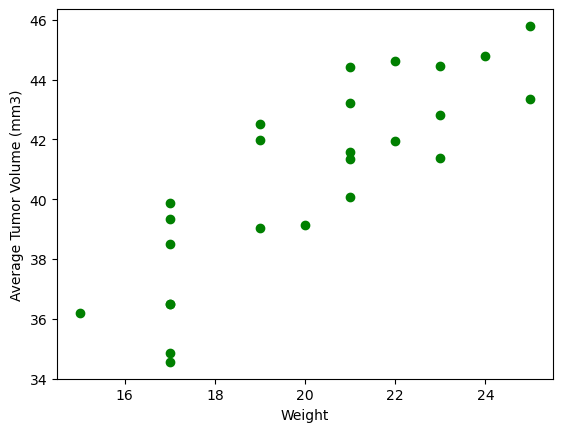

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_capomulin_regimen=capomulin_line_plot_mouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
scatter_mouse_weight=capomulin_line_plot_mouse.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(scatter_mouse_weight, avg_capomulin_regimen, color='green')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

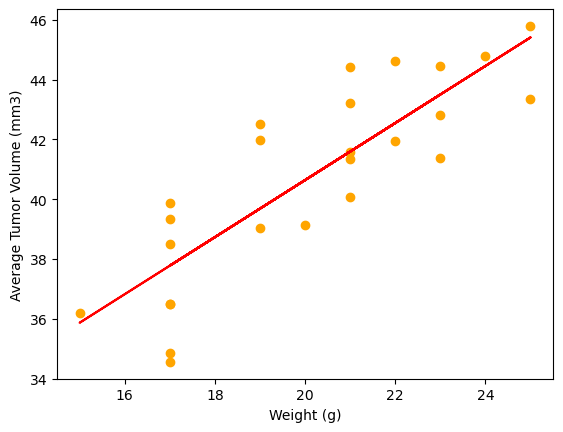

The correlation between mouse weight and the average tumor volume is 0.84


In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress, pearsonr
avg_capomulin_regimen=capomulin_line_plot_mouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
scatter_mouse_weight=capomulin_line_plot_mouse.groupby('Mouse ID')['Weight (g)'].mean()

correlation_model=round(st.pearsonr(scatter_mouse_weight,avg_capomulin_regimen)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_mouse_weight,avg_capomulin_regimen)
regression_model=scatter_mouse_weight*slope+intercept
line='y='+str(round(slope,2)) + 'x+' + str(round(intercept,2))

plt.scatter(scatter_mouse_weight, avg_capomulin_regimen, color="orange")
plt.plot(scatter_mouse_weight, regression_model, 'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

print(f'The correlation between mouse weight and the average tumor volume is {correlation_model}')
